In [3]:
import sys
sys.path.append("../") # go to parent dir

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from muss.custom_scripts.custom_utils import (
    get_params_as_dict, 
    fetch_preprocessor_used_in_muss_model_training, 
    strip_params
    read_split_lines, 
)

anno_file = f'/scratch/tkew/muss/resources/datasets/_69dfe358a3cfdc3ee54fce4ac572a0c9/train.complex'
tgt_file = f'/scratch/tkew/muss/resources/datasets/_69dfe358a3cfdc3ee54fce4ac572a0c9/train.simple'

In [5]:
srcs, _ = read_split_lines(anno_file)
tgts, _ = read_split_lines(tgt_file)

assert len(srcs) == len(tgts)

print(srcs[0], tgts[0])

<DEPENDENCYTREEDEPTHRATIO_1.0> <WORDRANKRATIO_1.0> <REPLACEONLYLEVENSHTEIN_0.8> <LENGTHRATIO_0.95> That requires a new perspective in leadership. This requires a new approach to leadership.


In [13]:
preprocessors = fetch_preprocessor_used_in_muss_model_training()

Loaded preprocessors: [LengthRatioPreprocessor(target_ratio=0.8, use_short_name=False), ReplaceOnlyLevenshteinPreprocessor(bucket_size=0.05, noise_std=0, target_ratio=0.8, use_short_name=False), WordRankRatioPreprocessor(language='en', target_ratio=0.8, use_short_name=False), DependencyTreeDepthRatioPreprocessor(language='en', target_ratio=0.8, use_short_name=False)]


In [14]:
data = []
for src, tgt in zip(srcs, tgts):
    d = get_params_as_dict(src, preprocessors)
    d['src'] = strip_params(src, preprocessors)
    d['tgt'] = tgt
    data.append(d)
    
print(len(data))

1194945


In [17]:
df = pd.DataFrame(data)
df

,DEPENDENCYTREEDEPTHRATIO,WORDRANKRATIO,REPLACEONLYLEVENSHTEIN,LENGTHRATIO,src,tgt
0,1.00,1.00,0.80,0.95,That requires a new perspective in leadership.,This requires a new approach to leadership.
1,1.00,0.85,0.70,1.05,"""I don't have doubts about the red card.","""I don't have a problem with the red card."
2,1.00,0.80,0.75,1.00,"Putting that into practice is not so easy, tho...","To put it into practice, however, is not so si..."
3,0.80,1.00,0.85,1.00,To build for success we tap into individual st...,By leveraging individual strengths we deliver ...
4,1.00,0.85,0.80,0.95,This issue of your personal composition is dep...,The subject of your own personal composition i...
...,...,...,...,...,...,...
1194940,1.15,1.00,0.80,0.95,"They might be not able to find new things, exe...","They may be unable to learn new things, carry ..."
1194941,0.80,0.90,0.80,1.00,A few writing that is online can be found in t...,Several online writing organizations can be fo...
1194942,1.00,0.85,0.80,1.05,"As you can see, working with a masonry contrac...","As you have seen, working with a professional ..."
1194943,1.00,0.90,0.75,0.95,That is a significant new development.,This is an important new development.


41 [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]


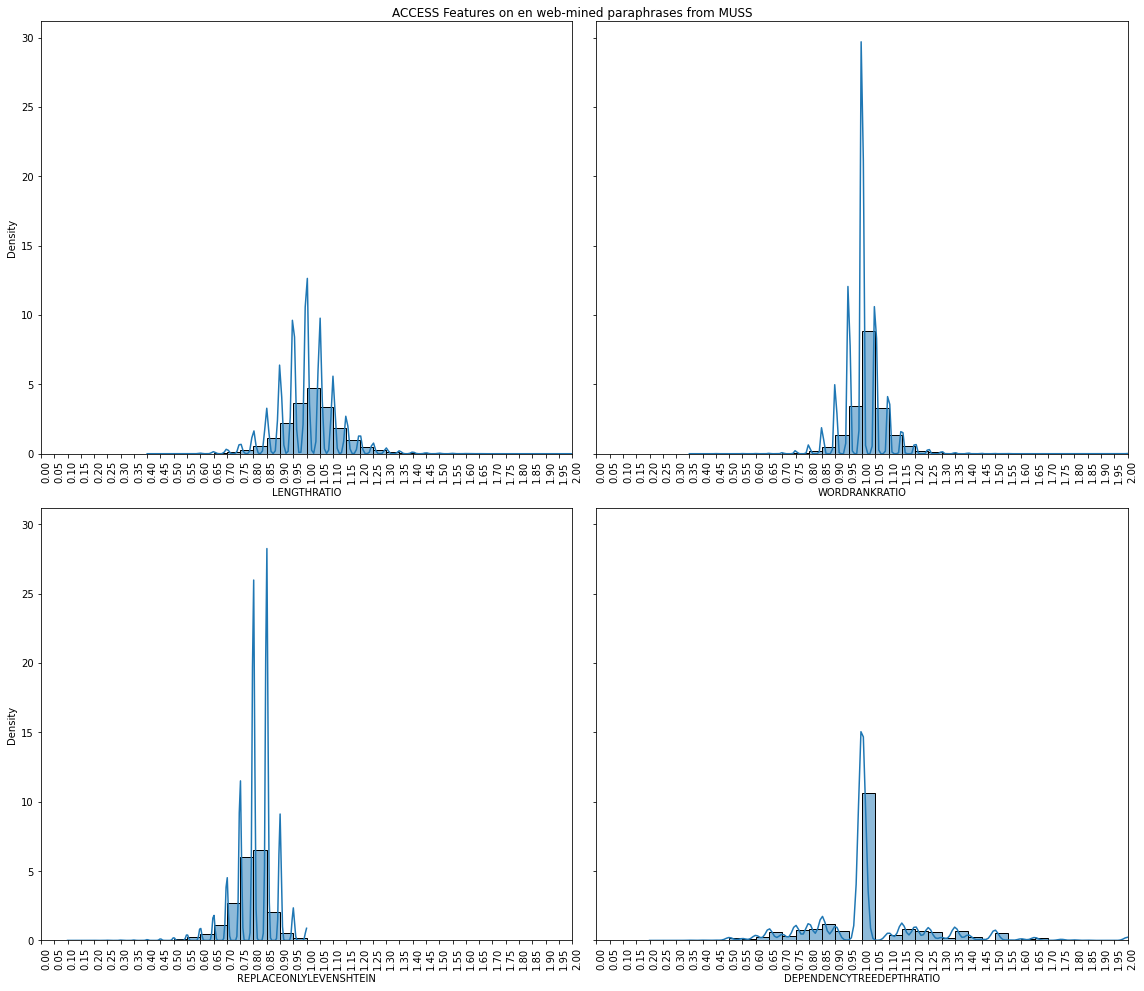

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16,14), sharey=True)

bins = np.arange(0.0, 2.01, 0.05)
print(len(bins), bins)

# sns hist
sns.histplot(df, x='LENGTHRATIO', kde=True, stat='density', bins=bins, binwidth=0.05, ax=axes[0][0], legend=True)
sns.histplot(df, x='WORDRANKRATIO', kde=True, stat='density', bins=bins, binwidth=0.05, ax=axes[0][1], legend=True)
sns.histplot(df, x='REPLACEONLYLEVENSHTEIN', kde=True, stat='density', bins=bins, binwidth=0.05, ax=axes[1][0], legend=True)
sns.histplot(df, x='DEPENDENCYTREEDEPTHRATIO', kde=True, stat='density', bins=bins, binwidth=0.05, ax=axes[1][1], legend=True)

for ax_i in axes:
    for ax_j in ax_i:
        ax_j.set_xlim(min(bins), max(bins))
        ax_j.set_xticks(bins)
        ax_j.set_xticklabels(list(map(lambda x: f'{x:.2f}', bins)), rotation=90, ha='right', rotation_mode='anchor')

fig.suptitle(f'ACCESS Features on en web-mined paraphrases from MUSS')
plt.tight_layout()
plt.savefig(f'../results/plots/access_features_on_en_muss_mined_assigned_by_train_function.png', dpi='figure')